<a href="https://colab.research.google.com/github/Madiha64/Madiha-CV-cat-dog-cnn/blob/main/Cgan_mnist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


dcgan_mnist Labels for generated images:  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5]
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0: [discriminator loss: 0.692796, acc: 0.398438] [adversarial loss: 0.691317, acc: 0.796875]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1: [discriminator loss: 0.692786, acc: 0.386719] [adversarial loss: 0.690849, acc: 0.867188]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
2: [discriminator loss: 0.692733, acc: 0.395833] [adversarial loss: 0.690480, acc: 0.890625]
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step
3: [discriminator loss: 0.692760, acc: 0.394531] [adversarial loss: 0.689981, acc: 0.917969]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
4: [discriminator loss: 0.692829, acc: 0.385938] [adversarial loss: 0.689492, acc: 0.934375]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
5: [discriminator loss: 0.692833, acc: 0.382812] [adversarial loss: 0.689089, acc: 0.945312]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
6: [discriminator loss: 0.692834, acc: 0.381696] [adversarial loss: 0.688611, acc: 0.953125]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
7: [discriminator loss: 0.692814, acc: 0.384766] [adversarial loss: 0.688185

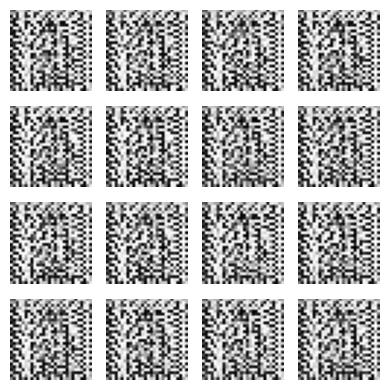

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
500: [discriminator loss: 0.707122, acc: 0.379023] [adversarial loss: 0.640643, acc: 0.999345]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
501: [discriminator loss: 0.707173, acc: 0.379077] [adversarial loss: 0.640588, acc: 0.999346]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
502: [discriminator loss: 0.707225, acc: 0.379038] [adversarial loss: 0.640533, acc: 0.999348]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
503: [discriminator loss: 0.707278, acc: 0.378937] [adversarial loss: 0.640478, acc: 0.999349]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
504: [discriminator loss: 0.707330, acc: 0.378899] [adversarial loss: 0.640424, acc: 0.999350]
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step
505: [discriminator loss: 0.707382, acc: 0.378891] [adversarial loss: 0.640369, acc: 0.999352]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
506: [discriminator loss: 0.707434, acc: 0.378791] [adversarial loss: 0.640314, acc: 0.999353]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
507: [discriminator los

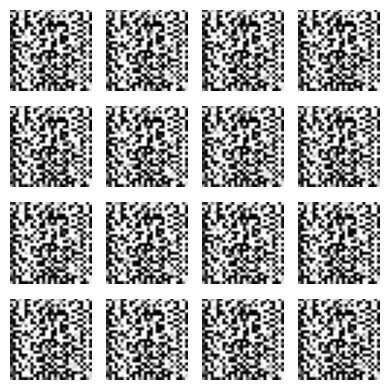

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization, Activation, LeakyReLU, Conv2DTranspose, Conv2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

# ---------------------------------------------
# Generator
def build_generator(inputs, labels, image_size):
    image_resize = image_size // 4
    kernel_size = 5
    layer_filters = [128, 64, 32, 1]

    x = concatenate([inputs, labels], axis=1)
    x = Dense(image_resize * image_resize * layer_filters[0])(x)
    x = Reshape((image_resize, image_resize, layer_filters[0]))(x)

    for filters in layer_filters:
        strides = 2 if filters > layer_filters[-2] else 1
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2DTranspose(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(x)

    x = Activation('sigmoid')(x)
    generator = Model([inputs, labels], x, name='generator')
    return generator

# ---------------------------------------------
# Discriminator
def build_discriminator(inputs, labels, image_size):
    kernel_size = 5
    layer_filters = [32, 64, 128, 256]

    y = Dense(image_size * image_size)(labels)
    y = Reshape((image_size, image_size, 1))(y)

    x = concatenate([inputs, y])
    for filters in layer_filters:
        strides = 2 if filters != layer_filters[-1] else 1
        x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
        x = LeakyReLU(alpha=0.2)(x)

    x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)

    discriminator = Model([inputs, labels], x, name='discriminator')
    return discriminator

# ---------------------------------------------
# Plotting function
def plot_images(generator, noise_inputs, show=True, step=0, model_name="model"):
    try:
        noise_input, noise_class = noise_inputs
        images = generator.predict([noise_input, noise_class])
        plt.figure(figsize=(4, 4))
        for i in range(images.shape[0]):
            plt.subplot(4, 4, i + 1)
            img = images[i, :, :, 0]
            plt.imshow(img, cmap='gray')
            plt.axis('off')
        plt.tight_layout()
        if show:
            plt.show()
        else:
            filename = f"{model_name}_step_{step}.png"
            plt.savefig(filename)
            plt.close()
    except Exception as e:
        print(f"plot_images() failed: {e}")

# ---------------------------------------------
# Training loop
def train(models, data, params):
    generator, discriminator, adversarial = models
    x_train, y_train = data
    batch_size, latent_size, train_steps, num_labels, model_name = params

    save_interval = 500
    noise_input = np.random.uniform(-1.0, 1.0, size=[16, latent_size])
    noise_class = np.eye(num_labels)[np.arange(0, 16) % num_labels]
    train_size = x_train.shape[0]

    print(model_name, "Labels for generated images: ", np.argmax(noise_class, axis=1))

    for i in range(train_steps):
        rand_indexes = np.random.randint(0, train_size, size=batch_size)
        real_images = x_train[rand_indexes]
        real_labels = y_train[rand_indexes]

        noise = np.random.uniform(-1.0, 1.0, size=[batch_size, latent_size])
        fake_labels = np.eye(num_labels)[np.random.choice(num_labels, batch_size)]
        fake_images = generator.predict([noise, fake_labels])

        x_images = np.concatenate((real_images, fake_images))
        x_labels = np.concatenate((real_labels, fake_labels))
        y = np.ones([2 * batch_size, 1])
        y[batch_size:, :] = 0.0

        loss, acc = discriminator.train_on_batch([x_images, x_labels], y)
        log = "%d: [discriminator loss: %f, acc: %f]" % (i, loss, acc)

        noise = np.random.uniform(-1.0, 1.0, size=[batch_size, latent_size])
        fake_labels = np.eye(num_labels)[np.random.choice(num_labels, batch_size)]
        y = np.ones([batch_size, 1])
        loss, acc = adversarial.train_on_batch([noise, fake_labels], y)

        log = "%s [adversarial loss: %f, acc: %f]" % (log, loss, acc)
        print(log)

        if (i + 1) % save_interval == 0:
            plot_images(generator, (noise_input, noise_class), show=True, step=(i + 1), model_name=model_name)
            generator.save(model_name + f"_step_{i+1}.h5")
            #keras.saving.save_model(model, 'my_model.keras')`

# ---------------------------------------------
# Master function
def build_and_train_models():
    (x_train, y_train), (_, _) = mnist.load_data()
    image_size = x_train.shape[1]
    x_train = np.reshape(x_train, [-1, image_size, image_size, 1]).astype('float32') / 255
    num_labels = 10
    y_train = np.eye(num_labels)[y_train]

    model_name = "dcgan_mnist"
    latent_size = 100
    batch_size = 64
    train_steps = 1000  # for faster test, increase later
    learning_rate = 2e-4
    decay = 6e-8

    # Discriminator
    input_shape = (image_size, image_size, 1)
    inputs = Input(shape=input_shape)
    labels = Input(shape=(num_labels,))
    discriminator = build_discriminator(inputs, labels, image_size)
    discriminator.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=learning_rate, decay=decay), metrics=['accuracy'])

    # Generator
    input_shape = (latent_size,)
    inputs = Input(shape=input_shape)
    labels = Input(shape=(num_labels,))
    generator = build_generator(inputs, labels, image_size)

    # Adversarial Model
    discriminator.trainable = False
    noise = Input(shape=(latent_size,))
    label_input = Input(shape=(num_labels,))
    fake_image = generator([noise, label_input])
    output = discriminator([fake_image, label_input])
    adversarial = Model([noise, label_input], output)
    adversarial.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=learning_rate * 0.5, decay=decay * 0.5), metrics=['accuracy'])

    # Start training
    models = (generator, discriminator, adversarial)
    data = (x_train, y_train)
    params = (batch_size, latent_size, train_steps, num_labels, model_name)
    train(models, data, params)

# Run it
build_and_train_models()
